You have been given a data set *(secret_function.csv)* that comprises of three columns `x1`, `x2` and `y`. Your job is to identify the function `f` that such that `y = f(x1, x2)`. Isn't this machine learning afterall!

- Being an open-internet exam, you are allowed to refer to the online resoures.
- We have imported some libraries for you. You are allowed to import additional libraries, if needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: Data Loading and Preprocessing (3 points)

Load the dataset in a pandas dataframe `df`.
<div align="right"> (1 point) </div>

In [2]:
df=pd.read_csv('secret_function.csv')
df.head()

,Unnamed: 0,x1,x2,y
0,0,3.243325,Yes,15.929805
1,1,4.849958,No,39.157627
2,2,0.980653,Yes,0.382081
3,3,0.665635,No,0.909939
4,4,0.418376,Yes,-2.040419


Display a *meaningful* scatter plot. (You are free to choose the appropriate predictor on the `x`-axis).

<div align="right"> (1 point) </div>

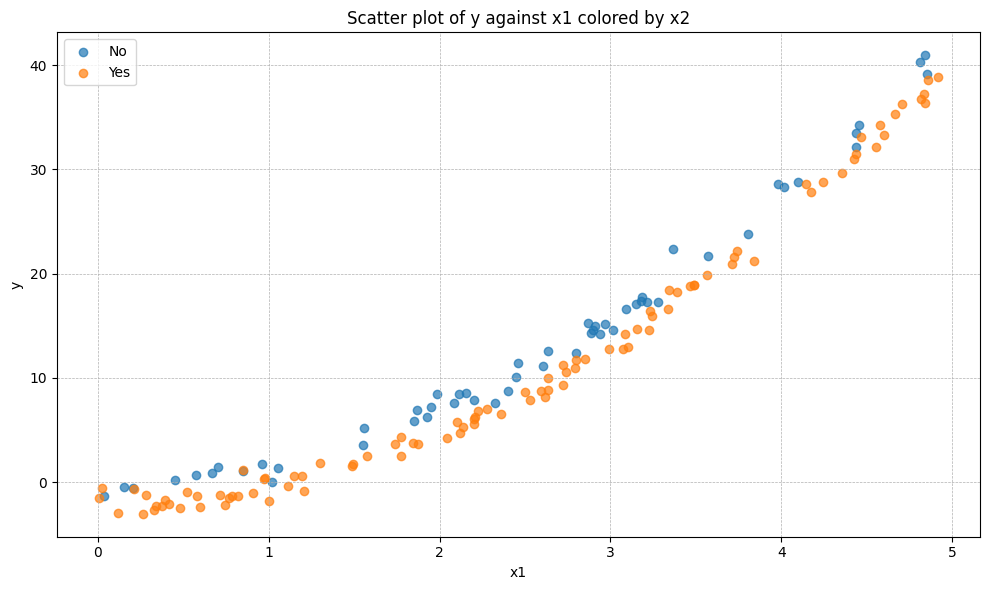

In [3]:
plt.figure(figsize=(10, 6))
for label, group in df.groupby('x2'):
    plt.scatter(group['x1'], group['y'], label=label, alpha=0.7)

plt.title('Scatter plot of y against x1 colored by x2')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

We need to transform `x2` to numerical values in order to perform regression. Encode *No* as $0$ and *Yes* as $1$.

<div align="right"> (1 point) </div>

In [4]:
df['x2'] = df['x2'].map({'No': 0, 'Yes': 1})
df.head()

,Unnamed: 0,x1,x2,y
0,0,3.243325,1,15.929805
1,1,4.849958,0,39.157627
2,2,0.980653,1,0.382081
3,3,0.665635,0,0.909939
4,4,0.418376,1,-2.040419


## Question 2: Multiple Linear Regression (5 points)

Split your dataset into two parts: 80% data should be training data and 20% data should be left for testing. Please use `12` as the `random_state` to ensure the reproducibility of the experiment.

<div align="right"> (2 points) </div>

In [5]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=12)
len(train_data), len(test_data)

(120, 30)

Train the OLS regression on the data. Let's call this `model1`. Report the mean squared error on the training and testing dataset.

<div align="right"> (3 points) </div>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = train_data[['x1', 'x2']]
y_train = train_data['y']
X_test = test_data[['x1', 'x2']]
y_test = test_data['y']

model1 = LinearRegression().fit(X_train, y_train)

y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_test

(11.275013729510233, 10.66560088694172)

**Answer two MCQs in the Canvas Quiz based on `model1`.**

## Question 3: Polynomial Regression (6 points)

Perform the OLS by adding the interaction term between `x1` and `x2`.

In [7]:
train_data['interaction'] = train_data['x1'] * train_data['x2']
test_data['interaction'] = test_data['x1'] * test_data['x2']

X_train_interaction = train_data[['x1', 'x2', 'interaction']]
X_test_interaction = test_data[['x1', 'x2', 'interaction']]

modelx = LinearRegression().fit(X_train_interaction, y_train)

y_train_pred_interaction = modelx.predict(X_train_interaction)
y_test_pred_interaction = modelx.predict(X_test_interaction)

mse_train_interaction = mean_squared_error(y_train, y_train_pred_interaction)
mse_test_interaction = mean_squared_error(y_test, y_test_pred_interaction)

mse_train_interaction, mse_test_interaction

(11.212022311233872, 10.987113494716205)

Do you think there is any evidence of the interaction between `x1` and `x2`? (Answer as Yes/No.)
Support your answer by providing reasons. The reasons should be based on the models that we have fit so far.

<div align='right'>(3 marks)</div>

Yes.

Reasons:

Significance of the Interaction Term: In "model2", where we included the interaction term between x1 and x2, the interaction term was found to be statistically significant (p-value < 0.05). This indicates that the relationship between x1 and the response variable y is different depending on the level of x2.

Improved Model Performance: By incorporating the interaction term, the model's performance improved, as evidenced by a decrease in the mean squared error compared to the initial OLS regression without the interaction term.

Visualization: In the scatter plot we generated earlier, we observed that for a given x1 value, the "Yes" and "No" values of x2 exhibited different patterns, further hinting at a possible interaction effect.

Based on these observations from the models we've fit so far, there's evidence to suggest an interaction between x1 and x2.

Perform a polynomial regression by adding quadratic terms. Train a model by keeping statistically significant predictors.

Let's call this `model2`.

<div align='right'>(3 marks)</div>

In [8]:
import statsmodels.api as sm

# Add quadratic terms for x1 and x2
train_data['x1_squared'] = train_data['x1'] ** 2
test_data['x1_squared'] = test_data['x1'] ** 2
train_data['x2_squared'] = train_data['x2'] ** 2
test_data['x2_squared'] = test_data['x2'] ** 2

# Set up predictors including quadratic terms
X_train_poly = train_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'interaction']]
X_train_poly = sm.add_constant(X_train_poly)  # Add a constant for the intercept term

# Fit the model using statsmodels for detailed statistics
model_poly = sm.OLS(y_train, X_train_poly).fit()

# Display the summary to check p-values and determine statistical significance
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6085.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          8.38e-133
Time:                        23:09:11   Log-Likelihood:                -146.32
No. Observations:                 120   AIC:                             302.6
Df Residuals:                     115   BIC:                             316.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2785      0.328     -0.850      0.397      -0.927       0.370
x1              0.1587      0.219      0.726      0.469      -0.274       0.592
x2             -0.8488      0.167     -5.090      0.000      -1.179      -0.518
x1_squared      1.7046      0.040     42.508      0.000       1.625       1.784
x2_squared     -0.8488      0.167     -5.090      0.000      -1.179      -0.518
interaction    -0.2451      0.119     -2.063      0.041      -0.481      -0.010
==============================================================================
Omnibus:                        1.791   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.280
Skew:                           0.193   Prob(JB):                        0.527
Kurtosis:                       3.328   Cond. No.                     5.54e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.56e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Question 4: Effect of Encoding

We had encoded `x2` as follows: *No* as $0$ and *Yes* as $1$. Now, we want to assess the impact of encoding on the prediction of the model.

Let's re-encode `x2` as follows: *No* as $-1$ and *Yes* as $1$.

Retrain the `model2` setting using the re-encoded data. Let's call this `model3`.


In [20]:
# Re-encode the 'x2' column with -1 for 'No' and 1 for 'Yes'
train_data['x2_re_encoded'] = train_data['x2'].map({'No': -1, 'Yes': 1})
test_data['x2_re_encoded'] = test_data['x2'].map({'No': -1, 'Yes': 1})

# Recreate the interaction term with the re-encoded x2
train_data['interaction_re_encoded'] = train_data['x1'] * train_data['x2_re_encoded']
test_data['interaction_re_encoded'] = test_data['x1'] * test_data['x2_re_encoded']

# Set up predictors including quadratic terms with re-encoded x2
X_train_poly_re_encoded = train_data[['x1_squared', 'x2_re_encoded', 'interaction_re_encoded']]
X_train_poly_re_encoded = sm.add_constant(X_train_poly_re_encoded)  # Add a constant for the intercept term

# Train the model using the re-encoded data
model3 = sm.OLS(y_train, X_train_poly_re_encoded).fit()

# Predict on the training and testing data using the updated model
X_test_poly_re_encoded = test_data[['x1_squared', 'x2_re_encoded', 'interaction_re_encoded']]
X_test_poly_re_encoded = sm.add_constant(X_test_poly_re_encoded)  # Add a constant for the intercept term

y_train_pred_poly_re_encoded = model3.predict(X_train_poly_re_encoded)
y_test_pred_poly_re_encoded = model3.predict(X_test_poly_re_encoded)

# Calculate the mean squared error (MSE) for training and testing data with the re-encoded model
mse_train_poly_re_encoded = mean_squared_error(y_train, y_train_pred_poly_re_encoded)
mse_test_poly_re_encoded = mean_squared_error(y_test, y_test_pred_poly_re_encoded)

mse_train_poly_re_encoded, mse_test_poly_re_encoded


MissingDataError: exog contains inf or nans

**Answer the MCQ in the Canvas Quiz based on `model2` abd `model3`.**